In [12]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os
from scipy import stats

In [2]:
#Задаём рабочую папку
os.chdir("/home/botiyava/learning/subjects/algo/lec5/eco228/Unions and State Labor Law")

In [3]:
#Читаем данные
df = pd.read_csv('Unions and State Labor Law_data', delim_whitespace=True)
df.head()

,STATE,DENS,COMP,RTW,PVT
0,NY,56.9,1,0,31.2
1,MI,49.6,1,0,30.2
2,WA,32.4,1,0,33.1
3,HI,54.6,1,0,24.7
4,AK,30.7,1,0,30.1


In [4]:
print(df)

   STATE  DENS  COMP  RTW   PVT
0     NY  56.9     1    0  31.2
1     MI  49.6     1    0  30.2
2     WA  32.4     1    0  33.1
3     HI  54.6     1    0  24.7
4     AK  30.7     1    0  30.1
5     WV  30.2     0    0  28.5
6     IL  30.6     0    0  26.9
7     OR  35.1     1    0  25.5
8     OH  38.4     1    0  25.3
9     PA  46.2     1    0  23.6
10    MO  26.1     0    0  26.7
11    CA  32.9     1    0  23.8
12    IN  28.6     0    0  24.4
13    MN  43.5     1    0  20.7
14    WI  44.8     1    0  20.3
15    NV  38.0     0    1  19.4
16    MT  25.0     1    0  20.7
17    IO  35.0     1    1  16.9
18    KY  32.8     0    0  17.5
19    DE  50.6     1    0  14.2
20    NJ  31.6     1    0  17.5
21    MA  52.5     1    0  14.4
22    RI  61.1     1    0  12.1
23    CT  51.6     1    0  14.1
24    MD  32.4     0    0  14.3
25    ME  47.7     1    0  11.2
26    AL  32.4     0    1  14.2
27    CO  32.1     0    0  14.8
28    TN  33.0     0    1  14.0
29    UT  42.3     0    1   9.4
30    NB

In [5]:
#Разделяем данные на две выборки
#Первая - закон right to work не принят
#Вторая - закон right to win принят
x = df[df["RTW"] == 0]["DENS"]
y = df[df["RTW"] == 1]["DENS"]
x.name, y.name = "не принят", "принят"

In [6]:
print(x)

0     56.9
1     49.6
2     32.4
3     54.6
4     30.7
5     30.2
6     30.6
7     35.1
8     38.4
9     46.2
10    26.1
11    32.9
12    28.6
13    43.5
14    44.8
16    25.0
18    32.8
19    50.6
20    31.6
21    52.5
22    61.1
23    51.6
24    32.4
25    47.7
27    32.1
31    26.1
36    25.7
37    17.4
41    41.4
43    37.3
Name: не принят, dtype: float64


In [7]:
print(y)

15    38.0
17    35.0
26    32.4
28    33.0
29    42.3
30    20.8
32    31.4
33    29.0
34    22.5
35    21.6
38    24.0
39    19.6
40    27.3
42    22.9
44    20.1
45    23.1
46    21.4
47    13.4
48    28.6
49    13.7
Name: принят, dtype: float64


In [13]:
#Применим тест Шапиро-Уилка. Мы видим, что обе группы имеют нормальное распределение, т.к. в обоих случаях
# p > 0.05. 
#Гипотеза нормальности не отвергается в обоих случаях.
from scipy.stats import shapiro
stat, p = shapiro(x)
print('Stats(x)=%.3f, p(x)=%.3f'%(stat,p))
stat, p = shapiro(y)
print('Stats(y)=%.3f, p(y)=%.3f'%(stat,p))

Stats(x)=0.952, p(x)=0.192
Stats(y)=0.965, p(y)=0.646


In [9]:
#Функция, которая построит 2 гистограммы, которые будут наложены друг на друга.
#Они нам нужны для выбора критерия оценки нашей гипотезы.
def two_histograms(x,y):
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color="red", alpha=0.8, linestyle="dashed")
    plt.axvline(y.mean(), color="blue", alpha=0.8, linestyle="dashed")
    plt.legend([x.name, y.name])

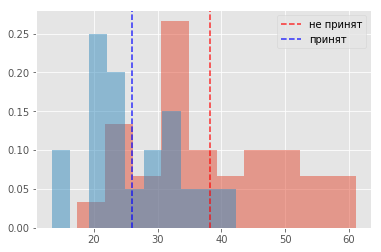

In [10]:
#Построив гистограммы мы лишь убеждаемся, что тест Шапиро-Уилка дал верный результат. 
#Хоть мы и не наблюдаем идеальных колокообразных графиков, но выбросов нет, легкую асимметрию можно опустить.
#Т.к. наши группы данных имеют нормальное распределение, то используем сравнение по среднему арифметическому,
#а это значит, что мы должны использовать критерий стьюдента.
two_histograms(x,y)

In [22]:
#Делаем тестирование по критерию Стьюдента
#т.к. p-value < alpha (0.05), то делаем вывод, что наблюдается зависимость присутствует.
#Гипотеза о равенстве средних арифметических не отвергнута.
from scipy.stats import ttest_ind
_, p = ttest_ind(x,y)
print('p-value=%.9f' % (p))

p-value=0.000092870


In [31]:
x = df[df["RTW"] == 0]["DENS"].reset_index()
y = df[df["RTW"] == 1]["DENS"].reset_index()
x.name, y.name = "не принят", "принят"

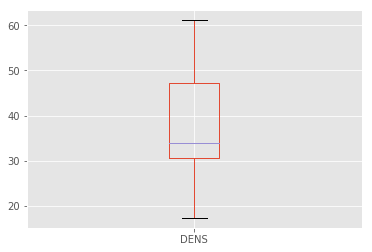

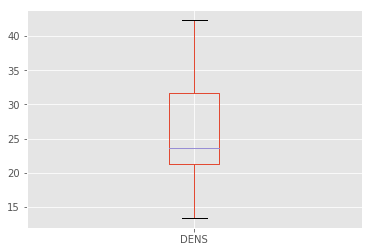

In [32]:
#Для более наглядного представления результатов анализа приведём ящиковую диаграмму,
#Построенную по сравниваемым выборкам.

plt.show(x.boxplot(column=['DENS']))
plt.show(y.boxplot(column=['DENS']))

## Интерпретация результата
### По итогам наших исследований было определено, что закон right to work влияет на процент  муниципальных служащих, которые состоят в профсоюзах.Так, в штатах, где этот закон принят процент служищих сильно меньше чем в тех штатах, где он не принят. Действительно, данный закон запрещает заключать контракты, которые требуют,чтобы все члены, получающие выгоду от проысоюзного контракта, вносили свой вклад в расходыпо представительству профсоюзов. Таким образом гос. служащим не выгодно состоять в профсоюзе, если в их штате принят данный закон.